### Name :  期末報告-高雄市議員分析
### Function :  1.利用LDA分析議員的問政風格 2.分析議員正面及負面表述

In [1]:
# -*- coding: utf-8 -*-
"""
@author: 陳靖婷

"""
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from collections import Counter

## 基本資料處理

### dataframe欄位整理

In [2]:
all = pd.read_csv("KCC Data/NewsCisDepLable-10144.csv") 
all #筆數:1-3666筆為新聞資料,3667-5929為議員問政資料,5930-10114為部門質詢

,ID,FileName,分類,負評,Content
0,1,2016/4/18,26.0,0.0,壽山動物園為增進動物飼養福祉及保育工作，特設立「高雄市壽山動物園認養辦法」設立動物認養專戶，...
1,2,2016/4/16,61.0,0.0,高雄翻轉須新政府全面力挺高雄市長陳菊日前在市議會做施政報告時指出，翻轉產業高雄的使命責任，面...
2,3,2016/4/18,18.0,0.0,台塑企業回饋地方藝文活動，週六晚間在高雄市仁武區運動公園登場，明華園歌仔戲團演出逐鹿中原戲碼...
3,4,2016/4/18,10.0,0.0,也談赦扁暗公鳥近來特赦阿扁呼聲不斷，台南與高雄市議會及醫界相繼呼籲馬英九特赦陳水扁。馬是繫鈴...
4,5,2016/4/17,52.0,0.0,高雄道德院在甲仙區有占地三十甲甲仙道場，每季高雄道德院住持三清太乙大宗師翁太明會率出家眾及信...
...,...,...,...,...,...
10139,10140,3-1-9-都市計畫委員會業務質詢及答復-2-00-曾麗燕-1,45.0,0.0,接下來，我要請問一下都發局的林副主委，我們過去一直為了房子建蔽率的問題，讓很多的住家非常的不...
10140,10141,3-1-9-都市計畫委員會業務質詢及答復-3-00-鄭孟洳-0,45.0,1.0,鄭議員孟洳：首先請教副市長，圖中是鐵路地下化後，目前要在原本鐵路規畫綠廊道，整個綠廊看起來是...
10141,10142,3-1-9-都市計畫委員會業務質詢及答復-4-00-林智鴻-2,45.0,0.0,林議員智鴻：最後，一樣要請教局長，主席，我是不是可以多1分鐘。主席（曾議員麗燕）：延長1分鐘...
10142,10143,3-1-9-都市計畫委員會業務質詢及答復-7-00-黃捷-0,45.0,0.0,黃議員捷：今天我想要講的事情很簡單，一樣是大社降編案的事情，我再講一次它的來龍去脈。經濟部在...


In [3]:
all_p = all.loc[3667:5929, ]
all_p #問政稿

,ID,FileName,分類,負評,Content
3667,3668,1-1-1000516-1-蘇炎城-2,16.0,0.0,高雄縣市合併後，高雄市對於國中、小的學童上下課通行安全維護的相當不錯，都有裝設倒數計時器，讓...
3668,3669,1-1-1000516-1-蘇炎城-5,57.0,0.0,伊斯坦大﹒貝雅夫﹒正福議員：主席、陳市長、三位副市長、市府各局處長、所有業務單位、議員同仁，...
3669,3670,1-1-1000516-1-蘇炎城-8,57.0,0.0,伊斯坦大‧貝雅夫‧正福議員：原民會是負責原住民權益最前線的業務單位，原民大會就是反映民意基層...
3670,3671,1-1-1000516-2-張勝富-3,14.0,0.0,張議員勝富：工務局長還有一件事情，從仁武到大社，到燕巢交流道，是不是有一條新的道路，在從前縣...
3671,3672,1-1-1000516-2-張勝富-6,8.0,0.0,張議員勝富：拜託了，局長！水利局長，我們大社的分洪，你們是做得如何？水利局李局長賢義：分洪的...
...,...,...,...,...,...
5925,5926,2-7-1070501-2-鍾盛有-2,29.0,0.0,請教交通局局長，市政府每年在清明節時都會有掃墓專車，方便民眾搭乘到墓園祭拜祖先，也獲得民眾的...
5926,5927,2-7-1070501-2-鍾盛有-5,63.0,0.0,接下去我想請教水利局。局長，本席要說明有關最近台灣地區，農漁民申請水井納管可以說是全國一致性...
5927,5928,2-7-1070501-2-鍾盛有-5,8.0,0.0,鍾議員盛有：局長，有一點我要建議，有關清疏，水利局當然做得很好，尤其市長上任之前，有帶領團隊...
5928,5929,2-7-1070501-2-鍾盛有-8,23.0,0.0,接下去請環保局答復，我有兩個建議，第一個，還要加強重視，每年提也沒有什麼很大的意義，但是確實...


In [4]:
all_p[['屆期','會期','時間','次','議員','個']] = all_p["FileName"].str.split('-',expand=True)
all_p #切分欄位資料

C:\Users\CHING TING\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,ID,FileName,分類,負評,Content,屆期,會期,時間,次,議員,個
3667,3668,1-1-1000516-1-蘇炎城-2,16.0,0.0,高雄縣市合併後，高雄市對於國中、小的學童上下課通行安全維護的相當不錯，都有裝設倒數計時器，讓...,1,1,1000516,1,蘇炎城,2
3668,3669,1-1-1000516-1-蘇炎城-5,57.0,0.0,伊斯坦大﹒貝雅夫﹒正福議員：主席、陳市長、三位副市長、市府各局處長、所有業務單位、議員同仁，...,1,1,1000516,1,蘇炎城,5
3669,3670,1-1-1000516-1-蘇炎城-8,57.0,0.0,伊斯坦大‧貝雅夫‧正福議員：原民會是負責原住民權益最前線的業務單位，原民大會就是反映民意基層...,1,1,1000516,1,蘇炎城,8
3670,3671,1-1-1000516-2-張勝富-3,14.0,0.0,張議員勝富：工務局長還有一件事情，從仁武到大社，到燕巢交流道，是不是有一條新的道路，在從前縣...,1,1,1000516,2,張勝富,3
3671,3672,1-1-1000516-2-張勝富-6,8.0,0.0,張議員勝富：拜託了，局長！水利局長，我們大社的分洪，你們是做得如何？水利局李局長賢義：分洪的...,1,1,1000516,2,張勝富,6
...,...,...,...,...,...,...,...,...,...,...,...
5925,5926,2-7-1070501-2-鍾盛有-2,29.0,0.0,請教交通局局長，市政府每年在清明節時都會有掃墓專車，方便民眾搭乘到墓園祭拜祖先，也獲得民眾的...,2,7,1070501,2,鍾盛有,2
5926,5927,2-7-1070501-2-鍾盛有-5,63.0,0.0,接下去我想請教水利局。局長，本席要說明有關最近台灣地區，農漁民申請水井納管可以說是全國一致性...,2,7,1070501,2,鍾盛有,5
5927,5928,2-7-1070501-2-鍾盛有-5,8.0,0.0,鍾議員盛有：局長，有一點我要建議，有關清疏，水利局當然做得很好，尤其市長上任之前，有帶領團隊...,2,7,1070501,2,鍾盛有,5
5928,5929,2-7-1070501-2-鍾盛有-8,23.0,0.0,接下去請環保局答復，我有兩個建議，第一個，還要加強重視，每年提也沒有什麼很大的意義，但是確實...,2,7,1070501,2,鍾盛有,8


In [5]:
all_p = all_p.loc[:, ["ID", "議員", "時間","負評","Content"]]
all_p #議員問政稿

,ID,議員,時間,負評,Content
3667,3668,蘇炎城,1000516,0.0,高雄縣市合併後，高雄市對於國中、小的學童上下課通行安全維護的相當不錯，都有裝設倒數計時器，讓...
3668,3669,蘇炎城,1000516,0.0,伊斯坦大﹒貝雅夫﹒正福議員：主席、陳市長、三位副市長、市府各局處長、所有業務單位、議員同仁，...
3669,3670,蘇炎城,1000516,0.0,伊斯坦大‧貝雅夫‧正福議員：原民會是負責原住民權益最前線的業務單位，原民大會就是反映民意基層...
3670,3671,張勝富,1000516,0.0,張議員勝富：工務局長還有一件事情，從仁武到大社，到燕巢交流道，是不是有一條新的道路，在從前縣...
3671,3672,張勝富,1000516,0.0,張議員勝富：拜託了，局長！水利局長，我們大社的分洪，你們是做得如何？水利局李局長賢義：分洪的...
...,...,...,...,...,...
5925,5926,鍾盛有,1070501,0.0,請教交通局局長，市政府每年在清明節時都會有掃墓專車，方便民眾搭乘到墓園祭拜祖先，也獲得民眾的...
5926,5927,鍾盛有,1070501,0.0,接下去我想請教水利局。局長，本席要說明有關最近台灣地區，農漁民申請水井納管可以說是全國一致性...
5927,5928,鍾盛有,1070501,0.0,鍾議員盛有：局長，有一點我要建議，有關清疏，水利局當然做得很好，尤其市長上任之前，有帶領團隊...
5928,5929,鍾盛有,1070501,0.0,接下去請環保局答復，我有兩個建議，第一個，還要加強重視，每年提也沒有什麼很大的意義，但是確實...


In [6]:
all_d = all.loc[5930:10143, ]
all_d #質詢稿

,ID,FileName,分類,負評,Content
5930,5931,1-1-0-市長簡要施政報告質詢及答覆-0-04-錢聖武-1,37.0,1.0,剩下的時間就借給周議員。周議員玲妏：謝謝議長，也謝謝錢議員把時間借給我。市長及所有的一級主管...
5931,5932,1-1-0-市長簡要施政報告質詢及答覆-0-05-黃淑美-3,66.0,0.0,再來，一個政府的運作，就好像一個公司在運作一樣。經營一個公司，財政當然是一個很大的問題，錢雖...
5932,5933,1-1-0-市長簡要施政報告質詢及答覆-0-07-連立堅-1,47.0,1.0,第一、有關縣市合併之後福利的部分，福利真的沒有縮水嗎？其實這個問題已經解決了，後來我們找到地...
5933,5934,1-1-0-市長簡要施政報告質詢及答覆-0-09-李鴻鈞-0,61.0,0.0,李議員鴻鈞：好，謝謝主席。大會主席許議長、徐秘書長、陳市長、市政府所有團隊、各局處長、在座的...
5934,5935,1-1-0-市長簡要施政報告質詢及答覆-0-09-李鴻鈞-4,17.0,0.0,陳議員玫娟：主席、市長、三位副市長，各位局處首長，大家辛苦了。抱歉，用餐時間，耽誤大家一點時...
...,...,...,...,...,...
10139,10140,3-1-9-都市計畫委員會業務質詢及答復-2-00-曾麗燕-1,45.0,0.0,接下來，我要請問一下都發局的林副主委，我們過去一直為了房子建蔽率的問題，讓很多的住家非常的不...
10140,10141,3-1-9-都市計畫委員會業務質詢及答復-3-00-鄭孟洳-0,45.0,1.0,鄭議員孟洳：首先請教副市長，圖中是鐵路地下化後，目前要在原本鐵路規畫綠廊道，整個綠廊看起來是...
10141,10142,3-1-9-都市計畫委員會業務質詢及答復-4-00-林智鴻-2,45.0,0.0,林議員智鴻：最後，一樣要請教局長，主席，我是不是可以多1分鐘。主席（曾議員麗燕）：延長1分鐘...
10142,10143,3-1-9-都市計畫委員會業務質詢及答復-7-00-黃捷-0,45.0,0.0,黃議員捷：今天我想要講的事情很簡單，一樣是大社降編案的事情，我再講一次它的來龍去脈。經濟部在...


In [7]:
all_d[['屆期','會期','time','質詢部門','個','次','議員','個數']] = all_d["FileName"].str.split('-',expand=True)
all_d #切分欄位資料

C:\Users\CHING TING\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,ID,FileName,分類,負評,Content,屆期,會期,time,質詢部門,個,次,議員,個數
5930,5931,1-1-0-市長簡要施政報告質詢及答覆-0-04-錢聖武-1,37.0,1.0,剩下的時間就借給周議員。周議員玲妏：謝謝議長，也謝謝錢議員把時間借給我。市長及所有的一級主管...,1,1,0,市長簡要施政報告質詢及答覆,0,04,錢聖武,1
5931,5932,1-1-0-市長簡要施政報告質詢及答覆-0-05-黃淑美-3,66.0,0.0,再來，一個政府的運作，就好像一個公司在運作一樣。經營一個公司，財政當然是一個很大的問題，錢雖...,1,1,0,市長簡要施政報告質詢及答覆,0,05,黃淑美,3
5932,5933,1-1-0-市長簡要施政報告質詢及答覆-0-07-連立堅-1,47.0,1.0,第一、有關縣市合併之後福利的部分，福利真的沒有縮水嗎？其實這個問題已經解決了，後來我們找到地...,1,1,0,市長簡要施政報告質詢及答覆,0,07,連立堅,1
5933,5934,1-1-0-市長簡要施政報告質詢及答覆-0-09-李鴻鈞-0,61.0,0.0,李議員鴻鈞：好，謝謝主席。大會主席許議長、徐秘書長、陳市長、市政府所有團隊、各局處長、在座的...,1,1,0,市長簡要施政報告質詢及答覆,0,09,李鴻鈞,0
5934,5935,1-1-0-市長簡要施政報告質詢及答覆-0-09-李鴻鈞-4,17.0,0.0,陳議員玫娟：主席、市長、三位副市長，各位局處首長，大家辛苦了。抱歉，用餐時間，耽誤大家一點時...,1,1,0,市長簡要施政報告質詢及答覆,0,09,李鴻鈞,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,10140,3-1-9-都市計畫委員會業務質詢及答復-2-00-曾麗燕-1,45.0,0.0,接下來，我要請問一下都發局的林副主委，我們過去一直為了房子建蔽率的問題，讓很多的住家非常的不...,3,1,9,都市計畫委員會業務質詢及答復,2,00,曾麗燕,1
10140,10141,3-1-9-都市計畫委員會業務質詢及答復-3-00-鄭孟洳-0,45.0,1.0,鄭議員孟洳：首先請教副市長，圖中是鐵路地下化後，目前要在原本鐵路規畫綠廊道，整個綠廊看起來是...,3,1,9,都市計畫委員會業務質詢及答復,3,00,鄭孟洳,0
10141,10142,3-1-9-都市計畫委員會業務質詢及答復-4-00-林智鴻-2,45.0,0.0,林議員智鴻：最後，一樣要請教局長，主席，我是不是可以多1分鐘。主席（曾議員麗燕）：延長1分鐘...,3,1,9,都市計畫委員會業務質詢及答復,4,00,林智鴻,2
10142,10143,3-1-9-都市計畫委員會業務質詢及答復-7-00-黃捷-0,45.0,0.0,黃議員捷：今天我想要講的事情很簡單，一樣是大社降編案的事情，我再講一次它的來龍去脈。經濟部在...,3,1,9,都市計畫委員會業務質詢及答復,7,00,黃捷,0


In [8]:
all_d = all_d.loc[:, ["ID", "議員","質詢部門","負評","Content"]]
all_d #部門質詢稿

,ID,議員,質詢部門,負評,Content
5930,5931,錢聖武,市長簡要施政報告質詢及答覆,1.0,剩下的時間就借給周議員。周議員玲妏：謝謝議長，也謝謝錢議員把時間借給我。市長及所有的一級主管...
5931,5932,黃淑美,市長簡要施政報告質詢及答覆,0.0,再來，一個政府的運作，就好像一個公司在運作一樣。經營一個公司，財政當然是一個很大的問題，錢雖...
5932,5933,連立堅,市長簡要施政報告質詢及答覆,1.0,第一、有關縣市合併之後福利的部分，福利真的沒有縮水嗎？其實這個問題已經解決了，後來我們找到地...
5933,5934,李鴻鈞,市長簡要施政報告質詢及答覆,0.0,李議員鴻鈞：好，謝謝主席。大會主席許議長、徐秘書長、陳市長、市政府所有團隊、各局處長、在座的...
5934,5935,李鴻鈞,市長簡要施政報告質詢及答覆,0.0,陳議員玫娟：主席、市長、三位副市長，各位局處首長，大家辛苦了。抱歉，用餐時間，耽誤大家一點時...
...,...,...,...,...,...
10139,10140,曾麗燕,都市計畫委員會業務質詢及答復,0.0,接下來，我要請問一下都發局的林副主委，我們過去一直為了房子建蔽率的問題，讓很多的住家非常的不...
10140,10141,鄭孟洳,都市計畫委員會業務質詢及答復,1.0,鄭議員孟洳：首先請教副市長，圖中是鐵路地下化後，目前要在原本鐵路規畫綠廊道，整個綠廊看起來是...
10141,10142,林智鴻,都市計畫委員會業務質詢及答復,0.0,林議員智鴻：最後，一樣要請教局長，主席，我是不是可以多1分鐘。主席（曾議員麗燕）：延長1分鐘...
10142,10143,黃捷,都市計畫委員會業務質詢及答復,0.0,黃議員捷：今天我想要講的事情很簡單，一樣是大社降編案的事情，我再講一次它的來龍去脈。經濟部在...


In [9]:
df_a = pd.concat([all_p, all_d], ignore_index=True) #合併dataframe
df_a #問政稿與質詢稿

,ID,議員,時間,負評,Content,質詢部門
0,3668,蘇炎城,1000516,0.0,高雄縣市合併後，高雄市對於國中、小的學童上下課通行安全維護的相當不錯，都有裝設倒數計時器，讓...,NaN
1,3669,蘇炎城,1000516,0.0,伊斯坦大﹒貝雅夫﹒正福議員：主席、陳市長、三位副市長、市府各局處長、所有業務單位、議員同仁，...,NaN
2,3670,蘇炎城,1000516,0.0,伊斯坦大‧貝雅夫‧正福議員：原民會是負責原住民權益最前線的業務單位，原民大會就是反映民意基層...,NaN
3,3671,張勝富,1000516,0.0,張議員勝富：工務局長還有一件事情，從仁武到大社，到燕巢交流道，是不是有一條新的道路，在從前縣...,NaN
4,3672,張勝富,1000516,0.0,張議員勝富：拜託了，局長！水利局長，我們大社的分洪，你們是做得如何？水利局李局長賢義：分洪的...,NaN
...,...,...,...,...,...,...
6472,10140,曾麗燕,NaN,0.0,接下來，我要請問一下都發局的林副主委，我們過去一直為了房子建蔽率的問題，讓很多的住家非常的不...,都市計畫委員會業務質詢及答復
6473,10141,鄭孟洳,NaN,1.0,鄭議員孟洳：首先請教副市長，圖中是鐵路地下化後，目前要在原本鐵路規畫綠廊道，整個綠廊看起來是...,都市計畫委員會業務質詢及答復
6474,10142,林智鴻,NaN,0.0,林議員智鴻：最後，一樣要請教局長，主席，我是不是可以多1分鐘。主席（曾議員麗燕）：延長1分鐘...,都市計畫委員會業務質詢及答復
6475,10143,黃捷,NaN,0.0,黃議員捷：今天我想要講的事情很簡單，一樣是大社降編案的事情，我再講一次它的來龍去脈。經濟部在...,都市計畫委員會業務質詢及答復


In [10]:
lee = df_a.loc[df_a.議員 == "李柏毅"]
lee.index = range(len(lee))
lee

,ID,議員,時間,負評,Content,質詢部門
0,5156,李柏毅,1040514,0.0,李議員柏毅：今天感謝兩位前輩陪伴小弟李柏毅共同聯合質詢，為什麼我們的總質詢時間我們希望聯合…...,NaN
1,5157,李柏毅,1040514,0.0,下一頁，剛才講到眷村文化保留，我在5月25日的時候會召開一個公聽會，針對現在眷村文化的保留，...,NaN
2,5257,李柏毅,1041112,0.0,再來，高雄市公園的維護費用，養工處今年的編列是兩億，我算一算，高雄市一共有640處公園，我們...,NaN
3,5258,李柏毅,1041112,0.0,李議員柏毅：所以公園算市政府的部分。請教工務局趙局長，如果要推捷運周邊沿線，假設這個公園有1...,NaN
4,5259,李柏毅,1041112,0.0,下來是警察局，有很多議員都會和局長討論監視器的問題，我有一個建議，我們剛剛從崇實里這邊來，我...,NaN
...,...,...,...,...,...,...
72,10031,李柏毅,NaN,0.0,我也看到勞工局王局長，不管資歷、經歷，都是我們看得到非常豐富精采的前輩，希望王局長來到高雄也...,衛生環境部門業務質詢及答復
73,10032,李柏毅,NaN,0.0,主席（何議員權峰）：局長，請回答。衛生局林局長立人：謝謝李議員關心護理人員權益的問題，因為公...,衛生環境部門業務質詢及答復
74,10048,李柏毅,NaN,0.0,接下來，我要跟捷運局這邊，今天早上也有聽到局長對目前輕軌的一些想法，其實這5場的公聽會我們都...,交通部門業務質詢及答復
75,10049,李柏毅,NaN,0.0,所以這邊我要請捷運局長針對我剛剛講的，很遺憾雖然市長今年的施政報告裡面沒有提到輕軌，但是我從...,交通部門業務質詢及答復


In [11]:
chen = df_a.loc[df_a.議員 == "陳麗珍"]
chen.index = range(len(chen))
chen

,ID,議員,時間,負評,Content,質詢部門
0,3805,陳麗珍,1000530,0.0,陳議員麗珍主席、市長、市府團隊的局處首長、媒體先生小姐、議會同仁、關心市政的市民朋友，大家好...,NaN
1,3806,陳麗珍,1000530,0.0,我在這裡再跟市長做一個建議，每年到4月，就是國中要入學報名，今年愈嚴重，市長，我當里長到現在...,NaN
2,3807,陳麗珍,1000530,1.0,再下一張，最近這兩個星期媒體報導，民眾最關心的就是黑心食品，飲料有塑化劑，魚肉有瘦肉精、有毒...,NaN
3,3808,陳麗珍,1000530,0.0,再來就是夜市，瑞豐夜市在此請教我們的經發局藍局長，我們的夜市，現在可以說是我們高雄市是一個很...,NaN
4,3999,陳麗珍,1001201,0.0,再來，我們在今年初到年底時，本來都積極在對外招商，但是本來外國來這裡投資資本額是258億，現...,NaN
...,...,...,...,...,...,...
124,9925,陳麗珍,NaN,0.0,再來，我要請教有關地價稅，地價稅是不是今年…。主席（李議員雅靜）：延長2分鐘。陳議員麗珍：因...,財經部門業務質詢及答復
125,9959,陳麗珍,NaN,0.0,再來我要請教文化局，閱讀方面很重要，我們的閱讀風氣也需要去倡導，最近文府國中在4月8日成立了...,教育部門業務質詢及答復
126,10019,陳麗珍,NaN,0.0,再來，我要建議衛生局。因為時間的關係，也跟局長建議一下，現在長照2.0服務效能應該要更周到，...,衛生環境部門業務質詢及答復
127,10046,陳麗珍,NaN,0.0,陳議員麗珍：我要請教捷運局長和交通局長，現在捷運搭乘量比以前提升很多，但是如果以使用率來講還...,交通部門業務質詢及答復


### 斷詞

### 李柏毅(民進黨籍)

In [13]:
text_list = list(lee['Content']) # 把所有message轉成一個list 用for iterate

lee_docs = pd.DataFrame(columns=['jieba_results'])
lee_docs['jieba_results'] = lee_docs['jieba_results'].astype('str')

doc_names = range(len(lee)) 
doc_names


range(0, 77)

In [14]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("../Lab/KCC Data/Dict/KccDict2020.txt")
jieba.set_dictionary("../Lab/KCC Data/Dict/dict.big.txt")

punctuation = "、，：:""()\ 。 n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    lee_docs = lee_docs.append(s, ignore_index=True)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\CHINGT~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.737 seconds.
Prefix dict has been built successfully.
Building prefix dict from C:\Users\CHING TING\Desktop\NSYSU1092\Lab\KCC Data\Dict\dict.big.txt ...
Loading model from cache C:\Users\CHINGT~1\AppData\Local\Temp\jieba.u90eaa97361b4dc1c7e2ecce640c36123.cache
Loading model cost 1.252 seconds.
Prefix dict has been built successfully.


In [14]:
lee_docs #李柏毅斷詞結果
#lee_docs.to_csv('final_data/lee_docs.csv',encoding='utf_8_sig') #將斷好字的資料轉csv檔

,jieba_results
0,李 議員 柏毅 今天 感謝 兩位 前輩 陪伴 小弟 李柏毅 共同 聯合 質詢 為什麼 我們...
1,下一頁 剛才 講 到 眷村 文化 保留 我 在 月 日 的 時候 會 召開 一個 公聽...
2,再 來 高雄市 公園 的 維護費用 養工處 今年 的 編列 是 兩億 我算 一算 高雄市 ...
3,李 議員 柏毅 所以 公園 算 市政府 的 部分 請教 工務局 趙 局長 如果 要 推 捷...
4,下來 是 警察局 有 很多 議員 都 會 和 局長 討論 監視器 的 問題 我 有 一個 ...
...,...
72,我 也 看到 勞工局 王 局長 不管 資歷 經歷 都 是 我們 看 得到 非常豐富 精采 ...
73,主席 何 議員 權峰 局長 請 回答 衛生局 林 局長 立 人 謝謝 李 議員 關心 護理...
74,接下來 我要 跟 捷運局 這邊 今天 早上 也 有 聽到 局長 對 目前 輕軌 的 一些 ...
75,所以 這邊 我要 請 捷運局 長 針對 我 剛剛 講的 很 遺憾 雖然 市長 今年 的 施...


In [15]:
lee['jieba_results'] = lee_docs
lee_df = lee[['ID','時間','議員','負評','Content','jieba_results']]
lee_df #斷詞後整合dataframe 

<ipython-input-15-3bf3f74f08d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lee['jieba_results'] = lee_docs


,ID,時間,議員,負評,Content,jieba_results
0,5156,1040514,李柏毅,0.0,李議員柏毅：今天感謝兩位前輩陪伴小弟李柏毅共同聯合質詢，為什麼我們的總質詢時間我們希望聯合…...,李 議員 柏毅 今天 感謝 兩位 前輩 陪伴 小弟 李柏毅 共同 聯合 質詢 為什麼 我們...
1,5157,1040514,李柏毅,0.0,下一頁，剛才講到眷村文化保留，我在5月25日的時候會召開一個公聽會，針對現在眷村文化的保留，...,下一頁 剛才 講 到 眷村 文化 保留 我 在 月 日 的 時候 會 召開 一個 公聽...
2,5257,1041112,李柏毅,0.0,再來，高雄市公園的維護費用，養工處今年的編列是兩億，我算一算，高雄市一共有640處公園，我們...,再 來 高雄市 公園 的 維護費用 養工處 今年 的 編列 是 兩億 我算 一算 高雄市 ...
3,5258,1041112,李柏毅,0.0,李議員柏毅：所以公園算市政府的部分。請教工務局趙局長，如果要推捷運周邊沿線，假設這個公園有1...,李 議員 柏毅 所以 公園 算 市政府 的 部分 請教 工務局 趙 局長 如果 要 推 捷...
4,5259,1041112,李柏毅,0.0,下來是警察局，有很多議員都會和局長討論監視器的問題，我有一個建議，我們剛剛從崇實里這邊來，我...,下來 是 警察局 有 很多 議員 都 會 和 局長 討論 監視器 的 問題 我 有 一個 ...
...,...,...,...,...,...,...
72,10031,NaN,李柏毅,0.0,我也看到勞工局王局長，不管資歷、經歷，都是我們看得到非常豐富精采的前輩，希望王局長來到高雄也...,我 也 看到 勞工局 王 局長 不管 資歷 經歷 都 是 我們 看 得到 非常豐富 精采 ...
73,10032,NaN,李柏毅,0.0,主席（何議員權峰）：局長，請回答。衛生局林局長立人：謝謝李議員關心護理人員權益的問題，因為公...,主席 何 議員 權峰 局長 請 回答 衛生局 林 局長 立 人 謝謝 李 議員 關心 護理...
74,10048,NaN,李柏毅,0.0,接下來，我要跟捷運局這邊，今天早上也有聽到局長對目前輕軌的一些想法，其實這5場的公聽會我們都...,接下來 我要 跟 捷運局 這邊 今天 早上 也 有 聽到 局長 對 目前 輕軌 的 一些 ...
75,10049,NaN,李柏毅,0.0,所以這邊我要請捷運局長針對我剛剛講的，很遺憾雖然市長今年的施政報告裡面沒有提到輕軌，但是我從...,所以 這邊 我要 請 捷運局 長 針對 我 剛剛 講的 很 遺憾 雖然 市長 今年 的 施...


## 主題分析(LDA)
### 做LDAvis

### 李柏毅(民進黨)

In [18]:
from gensim import corpora, models, utils
from gensim.models import LdaModel, CoherenceModel

In [20]:
#讀入斷詞後的文本
fList = []
with open("final_data/lee_docs.csv","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15) 
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:2] = ", fList[:2])
print("------------------------------")

fList[:2] =  [['jieba_results'], ['議員', '柏毅', '今天', '感謝', '兩位', '前輩', '陪伴', '小弟', '李柏毅', '共同', '聯合', '質詢', '為什麼', '我們', '質詢', '時間', '我們', '希望', '聯合', '知道', '剛剛', '警察局', '局長', '現在', '加昌', '派出所', '一個', '緊急事件', '其實', '坐在', '那裡', '痛苦', '緊張', '局長', '可以', '離席', '處理', '緊急事件', '主席', '可以', '局長', '處理', '緊急事件', '主席', '副議長', '昌達', '離開', '議會', '議員', '柏毅', '各位', '市府', '團隊', '很多', '坐在', '對面', '以前', '一起', '市政府', '拚過', '同事', '各位', '前輩', '大家', '今天', '這裡', '質詢', '大家', '其實', '緊張', '因為', '以前', '大家', '坐在', '那邊', '一起', '討論', '今天', '提出', '問題', '一個', '比較', '大方向', '問題', '因為', '難得', '大家', '坐在', '這邊', '凝聚', '市政府', '共識', '大家', '可以', '影片', '上面', '看到', '左營', '楠梓', '就是', '選區', '涵蓋', '國防部', '眷區', '土地', '涵蓋', '經濟部', '加工出口', '中油', '還有', '中油', '宿舍', '土地', '都畫', '出來', '大家', '大家', '可以', '看到', '藍色', '就是', '軍區', '這些', '黃色', '旁邊', '這些', '黑字', '左營', '共有', '眷村', '裡面', '黑色', '圍起來', '中油', '廠區', '黃色', '中油', '宿舍區', '這一塊', '紅色', '加工出口', '整個', '左楠區', '面積', '大家', '可以', '看到', '國防部', '海軍', '眷區', '中油', '加工出口', '這樣', '占地', '因為', '這是', '台灣

In [21]:
 #建立分析文本
dict = corpora.Dictionary(fList)
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(4966 unique tokens: ['jieba_results', '一些', '一件', '一個', '一塊']...)
------------------------------


In [22]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(jieba_results) for jieba_results in fList]   
print("corpus[:1] = ", corpus[:1])   
print("------------------------------")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 1)]]
------------------------------
print lists of [word:frequency]
('jieba_results', 1)


In [16]:
corpus_l = lee_df['jieba_results'].values.tolist() 

In [23]:
lda_model = models.ldamodel.LdaModel(corpus=corpus, id2word= dict, num_topics=7, passes=20, alpha='auto', chunksize=50, per_word_topics=True)
# print(ldamodel.print_topics())   列出最重要的前若干个主题

output = open("chen_topicmodel.txt", 'w', encoding='utf-8-sig')
lstTM = lda_model.print_topics(num_topics=7, num_words=20)
for tupleTM in lstTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
print("------------------------------")
print("Perplexity = ", lda_model.log_perplexity(corpus))

print("------------------------------")
cm = CoherenceModel(model=lda_model, texts=list(fList), dictionary=dict, coherence= 'c_v' )
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


#分4個主題 Perplexity =  -7.363414105412231
#分5個主題 Perplexity =  -7.371853962837009
#分7個主題Perplexity =  -7.390465558144844
#分9個主題Perplexity =  -7.397841035879939
#分10個主題Perplexity =  -7.405777423029085


strTM =  00.032*"我們" + 0.019*"議員" + 0.014*"市長" + 0.014*"這個" + 0.012*"柏毅" + 0.012*"可以" + 0.011*"沒有" + 0.008*"高雄" + 0.007*"處長" + 0.007*"局長" + 0.007*"高雄市" + 0.006*"因為" + 0.006*"所以" + 0.006*"市政府" + 0.006*"但是" + 0.005*"現在" + 0.005*"一個" + 0.005*"大家" + 0.005*"預算" + 0.005*"市民"

strTM =  10.010*"活動" + 0.008*"文化" + 0.007*"眷村" + 0.004*"文化局" + 0.004*"博物館" + 0.003*"比利時" + 0.003*"交響樂團" + 0.003*"舉辦" + 0.003*"萬張" + 0.003*"不論是" + 0.003*"電音" + 0.003*"關掉" + 0.003*"全世界" + 0.003*"協助" + 0.003*"院長" + 0.003*"參加" + 0.002*"觀光" + 0.002*"子弟" + 0.002*"留下來" + 0.002*"如何"

strTM =  20.013*"左營" + 0.009*"局長" + 0.008*"萬發" + 0.008*"我們" + 0.007*"系統" + 0.007*"消防局" + 0.006*"接管" + 0.006*"部落" + 0.005*"後勁" + 0.005*"分隊" + 0.005*"馬卡" + 0.005*"交通局" + 0.005*"交通" + 0.004*"因為" + 0.004*"如果" + 0.004*"鹽埕區" + 0.004*"所以" + 0.004*"高雄" + 0.004*"沒有" + 0.004*"屋後"

strTM =  30.028*"我們" + 0.019*"這個" + 0.018*"可以" + 0.015*"議員" + 0.014*"局長" + 0.011*"一個" + 0.009*"他們" + 0.008*"所以" + 0.008*"問題" + 0.008*"部分" + 0.008*"柏毅" + 0.007*"這些" + 0.007*"可能" + 0

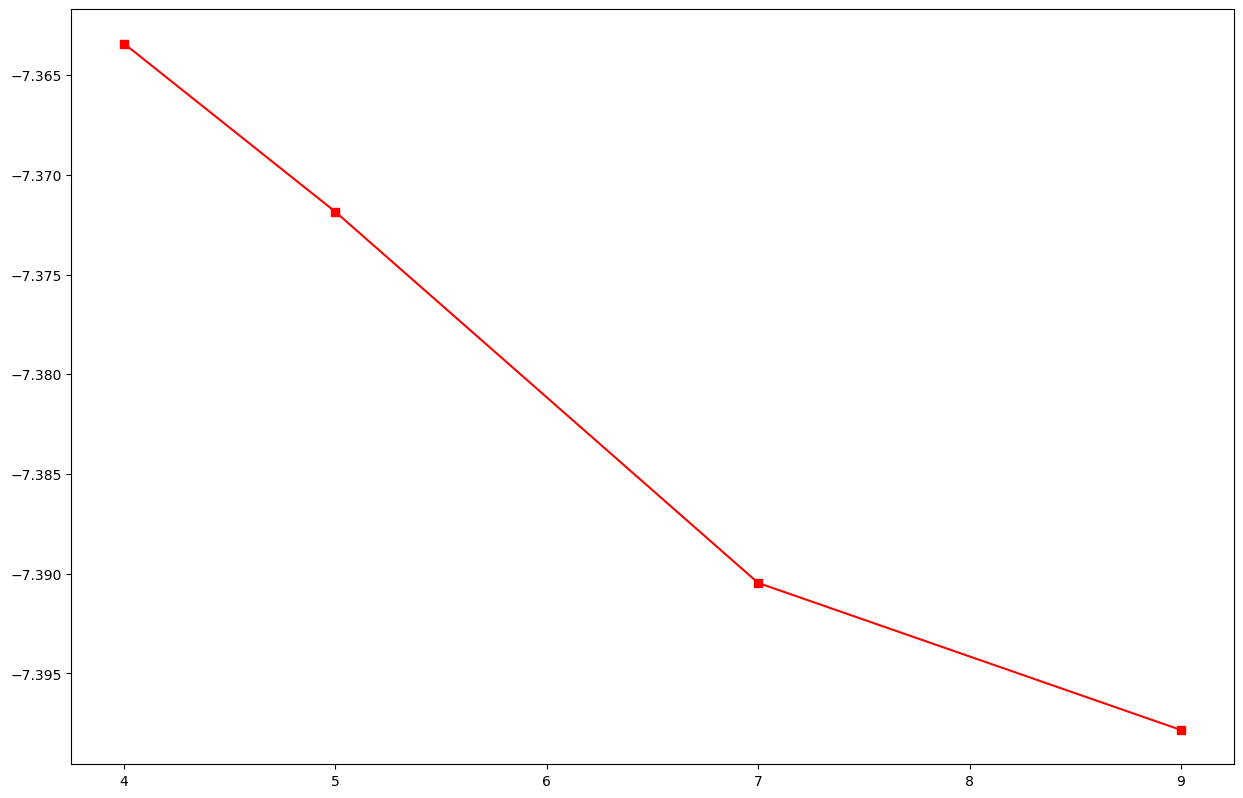

In [24]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

topic_numbers = [4,5,7,9]
Perplexity = [-7.363414105412231,-7.371853962837009, -7.390465558144844, -7.397841035879939]

plt.figure(figsize=(15,10),dpi=100,linewidth = 2)

plt.plot(topic_numbers,Perplexity,'s-',color = 'r', label="TSMC")

#選取主題數7

In [25]:
import pyLDAvis
import pyLDAvis.gensim #import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
pyLDAvis.enable_notebook
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dict, doc_topic_dist=None)
"""
参数说明：
prepare(topic_model, corpus, dictionary, doc_topic_dist=None)
topic_model：训练得到的 gensim LdaModel 对象，不支持其他 gensim 模型类型
corpus：以词袋形式表示的语料（用于训练主题模型的语料）
dictionary：用于构建词袋模型的字典，即 gensim Dictionary 对象
doc_topic_dist：可选参数，用于传入 LDA 模型的文档主题分布，默认取值为 None，当需要多次调用 prepare 函数时，可以传入该参数
"""
pyLDAvis.display(vis)


#λ接近1，則主題的字詞將較頻繁出現，λ接近0，則會有比較多獨特的字

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


決定將主題分成7個

### 政見與問政稿契合度分析

In [27]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  

l_vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
l_X = l_vectorizer.fit_transform(corpus_l) #  inputmust be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = l_vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf

l_transformer = TfidfTransformer()  
l_tfidf = l_transformer.fit_transform(l_X) # X : corpus x word matrix, output:201 x 4835

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation

l_LDA = LatentDirichletAllocation(n_components=7, random_state=None)
l_LDA.fit(l_X) # 用countrvectorizer() result 去fit 

topic_lee = list()
#觀看結果
for i,topic in enumerate(l_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    l_topic = [l_vectorizer.get_feature_names()[index] for index in topic.argsort()[-20:]]
    print(l_topic)
    for i in l_topic:
        topic_lee.append(i)

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TOP 10 WORDS PER TOPIC #0
['健身', '一千多元', '飛輪', '一排', '申請', '散步', '綠色', '城計畫', '附近', '園區', '費用', '許立明', '靶場', '住戶', '外面', '文化局', '回應', '圍牆', '中心', '運動']
TOP 10 WORDS PER TOPIC #1
['其實', '可能', '因為', '高雄市', '現在', '希望', '他們', '整個', '未來', '問題', '所以', '委員', '部分', '這些', '就是', '一個', '議員', '可以', '這個', '我們']
TOP 10 WORDS PER TOPIC #2
['柏毅', '希望', '市政府', '所以', '目前', '如果', '高雄市', '因為', '但是', '就是', '沒有', '非常', '高雄', '一個', '整個', '局長', '議員', '可以', '這個', '我們']
TOP 10 WORDS PER TOPIC #3
['大家', '因為', '現在', '所以', '但是', '質詢', '高雄市', '柏毅', '可能', '問題', '這些', '一些', '一個', '市長', '沒有', '局長', '可以', '這個', '議員', '我們']
TOP 10 WORDS PER TOPIC #4
['部分', '應該', '因為', '處王', '智立', '這些', '處長', '如果', '一個', '市長', '行政', '國際', '所以', '沒有', '可以', '這個', '柏毅', '局長', '議員', '我們']
TOP 10 WORDS PER TOPIC #5
['市政府', '之後', '整個', '過去', '現在', '這邊', '但是', '柏毅', '非常', '這些', '就是', '所以', '沒有', '左營', '可以', '一個', '議員', '局長', '這個', '我們']
TOP 10 WORDS PER TOPIC #6
['立委', '過去', '立法院', '應該', '爭取', '屋後', '建設', '設計', '這個', '基礎', '部分', '前瞻', '柏毅', '議

In [29]:
l_LDA.fit(l_tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(l_LDA.components_):
    print(f"TOP 20 WORDS PER TOPIC #{i}")
    print([l_vectorizer.get_feature_names()[index] for index in topic.argsort()[-20:]])

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TOP 20 WORDS PER TOPIC #0
['航線', '客機', '航空公司', '航班', '觀光客', '許副', '靶場', '許立明', '運輸系統', '借車', '回去', '租車', '中心', '國民', '小港', '桃園', '景點', '到處', '機場', '運動']
TOP 20 WORDS PER TOPIC #1
['臨港', '接到', '場都', '大眾', '轉乘', '副局長', '大順', '台鐵', '運動', '翠華', '路段', '運輸', '見城', '工程局', '揚材', '挖掉', '陸橋', '住戶', '紅線', '基座']
TOP 20 WORDS PER TOPIC #2
['報給', '比照辦理', '國際護士節', '改派', '家欽', '系統', '睦鄰', '基金', '護理人員', '長汀', '謝處', '監視器', '建置', '故障', '銓敘部', '資本', '活動中心', '公立醫院', '點亮', '警察局']
TOP 20 WORDS PER TOPIC #3
['部分', '希望', '高雄市', '如果', '左營', '問題', '所以', '市長', '整個', '高雄', '就是', '柏毅', '這些', '沒有', '一個', '可以', '這個', '局長', '議員', '我們']
TOP 20 WORDS PER TOPIC #4
['予以', '護岸', '管理', '代理', '大雨', '立體', '民政', '萬發', '連假', '大小', '完工', '東西向', '公頃', '停車場', '抽水站', '民政局', '學校', '水利局', '評鑑', '公園']
TOP 20 WORDS PER TOPIC #5
['稅金', '緝毒', '第三個', '小孩', '核定', '現值', '契稅', '系統', '社會局', '電動', '版本', '道路', '基金會', '瓶頸', '換購', '馬卡', '毒品', '房屋', '多少', '海洋局']
TOP 20 WORDS PER TOPIC #6
['據點', '乃千', '公聽會', '屋後', '分局', '打通', '氣體', '下載', '公斤', '智立'

In [30]:
for i in topic_lee:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

健身, 一千多元, 飛輪, 一排, 申請, 散步, 綠色, 城計畫, 附近, 園區, 費用, 許立明, 靶場, 住戶, 外面, 文化局, 回應, 圍牆, 中心, 運動, 其實, 可能, 因為, 高雄市, 現在, 希望, 他們, 整個, 未來, 問題, 所以, 委員, 部分, 這些, 就是, 一個, 議員, 可以, 這個, 我們, 柏毅, 希望, 市政府, 所以, 目前, 如果, 高雄市, 因為, 但是, 就是, 沒有, 非常, 高雄, 一個, 整個, 局長, 議員, 可以, 這個, 我們, 大家, 因為, 現在, 所以, 但是, 質詢, 高雄市, 柏毅, 可能, 問題, 這些, 一些, 一個, 市長, 沒有, 局長, 可以, 這個, 議員, 我們, 部分, 應該, 因為, 處王, 智立, 這些, 處長, 如果, 一個, 市長, 行政, 國際, 所以, 沒有, 可以, 這個, 柏毅, 局長, 議員, 我們, 市政府, 之後, 整個, 過去, 現在, 這邊, 但是, 柏毅, 非常, 這些, 就是, 所以, 沒有, 左營, 可以, 一個, 議員, 局長, 這個, 我們, 立委, 過去, 立法院, 應該, 爭取, 屋後, 建設, 設計, 這個, 基礎, 部分, 前瞻, 柏毅, 議員, 局長, 後勁, 高雄, 可以, 接管, 我們, 

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


李柏毅政見:
1. 讓年輕人敢生小孩，爭取 2-4 歲育兒津貼；推動非營利及公立幼兒園，打造友善育兒空間。
2. 開創高雄新經濟，推動橋頭第二科學園區。
3. 創造在地就業機會，加速產業轉型，推動中油廠區為「國家新材料循環經濟產業研發專區印；爭取中油總公司南遷。
4. 積極闢建「新台 17 線印全線開通，貫穿南北交通大動脈，紓解南北車潮。
5. 配合鐵路地下化，打通新莊一路，縫合左營新舊聚落交通往來。
6. 廣設國民運動中心，加速推動楠梓運動園區，結合社區活動中心。
7. 改善空汙，建立全市空氣品質監測網。
8. 打造便捷城市，加速推動捷運黃線，以健全捷運路網。
9. 關懷長者，廣設「不老食堂」。
10. 在地文化保存與推廣，結合見城計畫與眷村重整，重現左營新榮景。

In [31]:
politics_lee = "1. 讓年輕人敢生小孩，爭取 2-4 歲育兒津貼；推動非營利及公立幼兒園，打造友善育兒空間。2. 開創高雄新經濟，推動橋頭第二科學園區。3. 創造在地就業機會，加速產業轉型，推動中油廠區為「國家新材料循環經濟產業研發專區印；爭取中油總公司南遷。4. 積極闢建「新台 17 線印全線開通，貫穿南北交通大動脈，紓解南北車潮。5. 配合鐵路地下化，打通新莊一路，縫合左營新舊聚落交通往來。6. 廣設國民運動中心，加速推動楠梓運動園區，結合社區活動中心。7. 改善空汙，建立全市空氣品質監測網。8. 打造便捷城市，加速推動捷運黃線，以健全捷運路網。9. 關懷長者，廣設「不老食堂」。10. 在地文化保存與推廣，結合見城計畫與眷村重整，重現左營新榮景。"

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
politics_lee = re.sub(re_punctuation, "", politics_lee)
politics_lee = re.sub(r'[0-9]','',politics_lee)
politics_lee = re.sub(r'[a-zA-Z]','',politics_lee)
politics_lee = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_lee)  # 注意裡面不能有空白！
jieba.load_userdict("../Lab/KCC Data/Dict/KccDict2020.txt")
words = jieba.lcut(politics_lee, cut_all = False)
print(words)
words

[' ', '讓', '年輕人', '敢', '生小孩', '，', '爭取', '歲', '育兒', '津貼', '；', '推動', '非營利', '及', '公立', '幼兒園', '，', '打造', '友善', '育兒', '空間', ' ', '開創', '高雄', '新', '經濟', '，', '推動', '橋頭', '第二', '科學園區', ' ', '創造', '在', '地', '就業機會', '，', '加速', '產業', '轉型', '，', '推動', '中油', '廠區', '為', '「', '國家', '新', '材料', '循環', '經濟', '產業', '研發', '專區', '印', '；', '爭取', '中油總公司', '南遷', ' ', '積極', '闢建', '「', '新台線', '印', '全線', '開通', '，', '貫穿', '南北', '交通', '大動脈', '，', '紓解', '南北', '車潮', ' ', '配合', '鐵路地下化', '，', '打通', '新莊一路', '，', '縫合', '左營', '新舊', '聚落', '交通', '往來', ' ', '廣設', '國民', '運動', '中心', '，', '加速', '推動', '楠梓運動園區', '，', '結合', '社區活動中心', ' ', '改善', '空汙', '，', '建立', '全市', '空氣品質', '監測網', ' ', '打造', '便捷', '城市', '，', '加速', '推動', '捷運黃線', '，', '以', '健全', '捷運', '路網', ' ', '關懷', '長者', '，', '廣設', '「', '不老', '食堂', '在', '地', '文化', '保存', '與', '推廣', '，', '結合', '見', '城計畫', '與', '眷村', '重整', '，', '重現', '左營', '新榮景']


C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[' ',
 '讓',
 '年輕人',
 '敢',
 '生小孩',
 '，',
 '爭取',
 '歲',
 '育兒',
 '津貼',
 '；',
 '推動',
 '非營利',
 '及',
 '公立',
 '幼兒園',
 '，',
 '打造',
 '友善',
 '育兒',
 '空間',
 ' ',
 '開創',
 '高雄',
 '新',
 '經濟',
 '，',
 '推動',
 '橋頭',
 '第二',
 '科學園區',
 ' ',
 '創造',
 '在',
 '地',
 '就業機會',
 '，',
 '加速',
 '產業',
 '轉型',
 '，',
 '推動',
 '中油',
 '廠區',
 '為',
 '「',
 '國家',
 '新',
 '材料',
 '循環',
 '經濟',
 '產業',
 '研發',
 '專區',
 '印',
 '；',
 '爭取',
 '中油總公司',
 '南遷',
 ' ',
 '積極',
 '闢建',
 '「',
 '新台線',
 '印',
 '全線',
 '開通',
 '，',
 '貫穿',
 '南北',
 '交通',
 '大動脈',
 '，',
 '紓解',
 '南北',
 '車潮',
 ' ',
 '配合',
 '鐵路地下化',
 '，',
 '打通',
 '新莊一路',
 '，',
 '縫合',
 '左營',
 '新舊',
 '聚落',
 '交通',
 '往來',
 ' ',
 '廣設',
 '國民',
 '運動',
 '中心',
 '，',
 '加速',
 '推動',
 '楠梓運動園區',
 '，',
 '結合',
 '社區活動中心',
 ' ',
 '改善',
 '空汙',
 '，',
 '建立',
 '全市',
 '空氣品質',
 '監測網',
 ' ',
 '打造',
 '便捷',
 '城市',
 '，',
 '加速',
 '推動',
 '捷運黃線',
 '，',
 '以',
 '健全',
 '捷運',
 '路網',
 ' ',
 '關懷',
 '長者',
 '，',
 '廣設',
 '「',
 '不老',
 '食堂',
 '在',
 '地',
 '文化',
 '保存',
 '與',
 '推廣',
 '，',
 '結合',
 '見',
 '城計畫',
 '與',
 '眷村',
 '重整',
 '，',
 '重現',
 

In [39]:
#清理政見的斷詞結果
inspect_words = jieba.cut(politics_lee, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(words) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)
text

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


" [', '讓', '年輕人', '敢', '生小孩', '，', '爭取', '歲', '育兒', '津貼', '；', '推動', '非營利', '及', '公立', '幼兒園', '，', '打造', '友善', '育兒', '空間', ', '開創', '高雄', '新', '經濟', '，', '推動', '橋頭', '第二', '科學園區', ', '創造', '在', '地', '就業機會', '，', '加速', '產業', '轉型', '，', '推動', '中油', '廠區', '為', '「', '國家', '新', '材料', '循環', '經濟', '產業', '研發', '專區', '印', '；', '爭取', '中油總公司', '南遷', ', '積極', '闢建', '「', '新台線', '印', '全線', '開通', '，', '貫穿', '南北', '交通', '大動脈', '，', '紓解', '南北', '車潮', ', '配合', '鐵路地下化', '，', '打通', '新莊一路', '，', '縫合', '左營', '新舊', '聚落', '交通', '往來', ', '廣設', '國民', '運動', '中心', '，', '加速', '推動', '楠梓運動園區', '，', '結合', '社區活動中心', ', '改善', '空汙', '，', '建立', '全市', '空氣品質', '監測網', ', '打造', '便捷', '城市', '，', '加速', '推動', '捷運黃線', '，', '以', '健全', '捷運', '路網', ', '關懷', '長者', '，', '廣設', '「', '不老', '食堂', '在', '地', '文化', '保存', '與', '推廣', '，', '結合', '見', '城計畫', '與', '眷村', '重整', '，', '重現', '左營', '新榮景'] [', '讓', '年輕人', '敢', '生小孩', '，', '爭取', '歲', '育兒', '津貼', '；', '推動', '非營利', '及', '公立', '幼兒園', '，', '打造', '友善', '育兒', '空間', ', '開創', '高雄', '新', '經濟', '

In [42]:
# 政見做tfidf
l_vectorizer = CountVectorizer()  
l_X = l_vectorizer.fit_transform(words)  
word = l_vectorizer.get_feature_names() 
l_transformer = TfidfTransformer()  
l_tfidf = l_transformer.fit_transform(l_X) #143 word in 

l_LDA = LatentDirichletAllocation(n_components=4
                                  , random_state=None)

#政見做LDA
l_LDA.fit(l_tfidf)
l_topic_politics = list()
#觀看結果
for i,topic in enumerate(l_LDA.components_):
    print(f"TOP 20 WORDS PER TOPIC #{i}")
    topic_l = [l_vectorizer.get_feature_names()[index] for index in topic.argsort()[-20:]]
    print(topic_l)
    for i in topic_l:
        l_topic_politics.append(i)

        #此處分4個主題，若分太多主題字詞重複率將會非常高，主題也會非常相近

TOP 20 WORDS PER TOPIC #0
['廠區', '國民', '眷村', '南遷', '聚落', '往來', '食堂', '紓解', '科學園區', '推廣', '文化', '關懷', '開通', '生小孩', '開創', '城市', '爭取', '南北', '產業', '加速']
TOP 20 WORDS PER TOPIC #1
['非營利', '第二', '積極', '空間', '貫穿', '配合', '循環', '就業機會', '新莊一路', '打通', '不老', '高雄', '津貼', '闢建', '捷運黃線', '全線', '捷運', '結合', '廣設', '左營']
TOP 20 WORDS PER TOPIC #2
['廠區', '轉型', '健全', '監測網', '空汙', '年輕人', '專區', '國家', '研發', '建立', '新台線', '創造', '便捷', '中心', '城計畫', '楠梓運動園區', '空氣品質', '育兒', '交通', '推動']
TOP 20 WORDS PER TOPIC #3
['全市', '重現', '新舊', '鐵路地下化', '中油', '大動脈', '公立', '中油總公司', '運動', '橋頭', '幼兒園', '保存', '車潮', '改善', '長者', '材料', '縫合', '新榮景', '經濟', '打造']


C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
# #政見所有topic 總表
for i in l_topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

廠區, 國民, 眷村, 南遷, 聚落, 往來, 食堂, 紓解, 科學園區, 推廣, 文化, 關懷, 開通, 生小孩, 開創, 城市, 爭取, 南北, 產業, 加速, 非營利, 第二, 積極, 空間, 貫穿, 配合, 循環, 就業機會, 新莊一路, 打通, 不老, 高雄, 津貼, 闢建, 捷運黃線, 全線, 捷運, 結合, 廣設, 左營, 廠區, 轉型, 健全, 監測網, 空汙, 年輕人, 專區, 國家, 研發, 建立, 新台線, 創造, 便捷, 中心, 城計畫, 楠梓運動園區, 空氣品質, 育兒, 交通, 推動, 全市, 重現, 新舊, 鐵路地下化, 中油, 大動脈, 公立, 中油總公司, 運動, 橋頭, 幼兒園, 保存, 車潮, 改善, 長者, 材料, 縫合, 新榮景, 經濟, 打造, 

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
match_column_lee = list(set(l_topic_politics).intersection(l_vectorizer.get_feature_names()))
match_column_lee

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['積極',
 '新莊一路',
 '中油總公司',
 '大動脈',
 '全市',
 '紓解',
 '車潮',
 '開通',
 '全線',
 '廣設',
 '幼兒園',
 '循環',
 '空汙',
 '打通',
 '國家',
 '轉型',
 '食堂',
 '運動',
 '健全',
 '關懷',
 '南遷',
 '推動',
 '配合',
 '城市',
 '橋頭',
 '往來',
 '推廣',
 '建立',
 '保存',
 '高雄',
 '捷運',
 '改善',
 '結合',
 '第二',
 '長者',
 '南北',
 '不老',
 '打造',
 '產業',
 '生小孩',
 '監測網',
 '年輕人',
 '空間',
 '研發',
 '爭取',
 '貫穿',
 '眷村',
 '公立',
 '新舊',
 '津貼',
 '闢建',
 '非營利',
 '城計畫',
 '中油',
 '捷運黃線',
 '交通',
 '加速',
 '鐵路地下化',
 '經濟',
 '楠梓運動園區',
 '專區',
 '新台線',
 '空氣品質',
 '廠區',
 '文化',
 '便捷',
 '縫合',
 '重現',
 '育兒',
 '左營',
 '創造',
 '開創',
 '材料',
 '聚落',
 '新榮景',
 '就業機會',
 '國民',
 '科學園區',
 '中心']

In [45]:
document_term_lee = pd.DataFrame(l_X.toarray(), columns = l_vectorizer.get_feature_names())
document_term_lee

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,不老,中心,中油,中油總公司,交通,便捷,保存,健全,全市,全線,...,重現,鐵路地下化,長者,開創,開通,關懷,闢建,非營利,食堂,高雄
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
match_document_politics_lee = document_term_lee[match_column_lee]
match_document_politics_lee

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,積極,新莊一路,中油總公司,大動脈,全市,紓解,車潮,開通,全線,廣設,...,左營,創造,開創,材料,聚落,新榮景,就業機會,國民,科學園區,中心
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
match_document_politics_lee["sum"] = match_document_politics_lee.sum(axis=1)
match_document_politics_lee

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-47-5c819ce09db1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics_lee["sum"] = match_document_politics_lee.sum(axis=1)


,積極,新莊一路,中油總公司,大動脈,全市,紓解,車潮,開通,全線,廣設,...,創造,開創,材料,聚落,新榮景,就業機會,國民,科學園區,中心,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
sum(match_document_politics_lee['sum'].tolist()) / len(match_column_lee) /len(lee) # 李柏毅質詢內容與政見整體相關度

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.015617294098306755

## 情緒分析

In [49]:
df_s= pd.concat([chen, lee], ignore_index=True) #合併dataframe
df_s = df_s[['議員','負評']]
df_s 

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,議員,負評
0,陳麗珍,0.0
1,陳麗珍,0.0
2,陳麗珍,1.0
3,陳麗珍,0.0
4,陳麗珍,0.0
...,...,...
201,李柏毅,0.0
202,李柏毅,0.0
203,李柏毅,0.0
204,李柏毅,0.0


In [50]:
df_m= df_s.groupby('議員').mean()  #平均數
df_m

C:\Users\CHING TING\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,負評
議員,
李柏毅,0.025974
陳麗珍,0.116279
